# 10 lebels

Label Description
0     Tshirt
1     Trouser
2     Pullover
3     Dress
4     Coat
5     Sandal
6     Shirt
7     Sneaker
8     Bag
9     Ankle boot

In [47]:
from keras.datasets import fashion_mnist
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

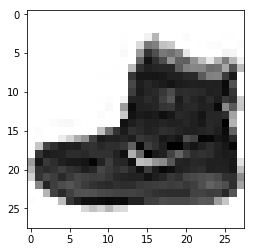

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0],cmap='gray_r')

In [49]:
y_train[0]

9

In [50]:
x_train.max()

255

In [51]:
#preprocessing data
#normalize xtrain and xtest by deviding max value of image
x_train=x_train/255
x_test=x_test/255

In [52]:
#reshape x to a 4 dim of single channel
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [53]:
# as the data is categorical so onehot
from keras.utils import to_categorical

y_cat_train=to_categorical(y_train)
y_cat_test=to_categorical(y_test)

In [54]:
#build model
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [55]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax')) #cause 10 o/p

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [57]:
result = model.fit(x_train,y_cat_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0698 - acc: 0.9726
Epoch 2/5
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0497 - acc: 0.9808: 1
Epoch 3/5
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0434 - acc: 0.9832
Epoch 4/5
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0391 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0358 - acc: 0.9860


In [58]:
result.history['acc']

[0.9725750039736429,
 0.9807500059127807,
 0.9831550045013427,
 0.984831670888265,
 0.9860216713269552]

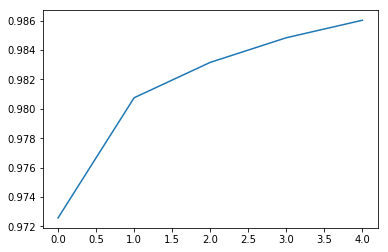

In [59]:
plt.plot(result.history['acc'])

In [60]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 4s 409us/step


[0.05326828010231256, 0.9802700078964234]

In [61]:
model.metrics_names

['loss', 'acc']

In [62]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.90      0.79      0.84      1000
           3       0.91      0.93      0.92      1000
           4       0.87      0.78      0.83      1000
           5       0.97      0.99      0.98      1000
           6       0.65      0.82      0.72      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.99      0.98      1000
           9       0.99      0.93      0.96      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



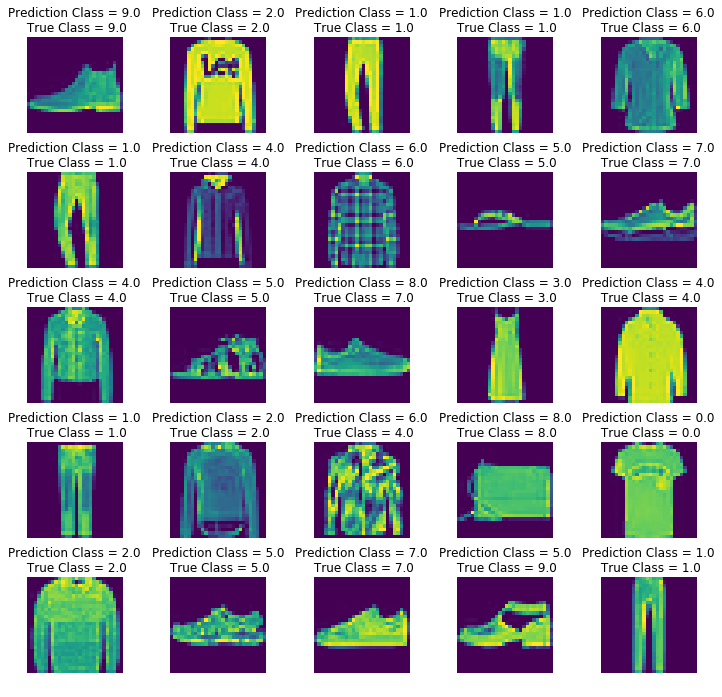

In [63]:
import numpy as np
L=5
W=5
fig,axes=plt.subplots(L, W, figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class = {:0.1f}\n True Class = {:0.1f}'.format(predictions[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [72]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [79]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(result):
    hist = result.history
    acc = hist['acc']
    loss = hist['loss']
    epochs = list(range(1,len(acc)+1))
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
   
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_tl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename='accuracy-loss')
plot_accuracy_and_loss(result)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]

